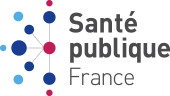

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Objectif
* Trouver une idée d’application : sélection des variables pertinentes
* Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)
* Automatisant des traitements.
* Tests hypothèses et analyses exploratoires
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
* Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


# Sommaire
**Données**
- Compréhension des données

Chargez le fichier `fr.openfoodfacts.org.products.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t') 

# Les  données
## Compréhension des données
Chargement des 4 fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(),shape et describe()**

<img src='./oc_logo.png' width=15px /> Afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

<img src='./oc_logo.png' width=15px /> Quelle est la taille du dataframe ?

In [4]:
df.shape

(320772, 162)

<img src='./oc_logo.png' width=15px /> Calculez les statistiques élémentaires (min, max, moyenne, écart type, etc) pour toutes les variables quantitatives.

In [5]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [6]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

code 320638
url 320749
creator 3535
created_t 189636
created_datetime 189568
last_modified_t 180639
last_modified_datetime 180495
product_name 221347
generic_name 38584
quantity 13826
packaging 14547
packaging_tags 12064
brands 58784
brands_tags 50253
categories 36982
categories_tags 21142
categories_fr 21152
origins 4840
origins_tags 4372
manufacturing_places 7308
manufacturing_places_tags 6736
labels 18114
labels_tags 13653
labels_fr 13655
emb_codes 8462
emb_codes_tags 8158
first_packaging_code_geo 1602
cities 3
cities_tags 2572
purchase_places 5120
stores 3259
countries 1434
countries_tags 725
countries_fr 722
ingredients_text 205520
allergens 12939
allergens_fr 19
traces 8378
traces_tags 3578
traces_fr 3584
serving_size 25423
no_nutriments 0
additives_n 31
additives 196069
additives_tags 41537
additives_fr 41537
ingredients_from_palm_oil_n 3
ingredients_from_palm_oil 0
ingredients_from_palm_oil_tags 14
ingredients_that_may_be_from_palm_oil_n 7
ingredients_that_may_be_from_palm_oil 

Une composante dite « négative », calculée à partir des teneurs en nutriments dont la consommation doit être limitée : énergie, sucres simples, acides gras saturésn sel et sodium ;
<Br>
Une composante dite « positive », calculée en intégrant les teneurs en nutriment dont la consommation est recommandée : fibres, protéines;
<Br>
Une deuxième composante « positive », calculée à partir des teneurs d’une catégorie spécifique d’aliments : les fruits/légumes/fruits à coque.
<Br>
**Energie**
Les données qui nous interesse sont l’énergie (kJ/100g), la graisse, les gras saturés (g/100g), les sucres simples (g/100g) et le sel (mg/100g)
<Br>
**Nutritif**
des facteurs nutritionnels à favoriser : les fibres (g/100g), les protéines (g/100g), les fruits et légumes, légumineuses et fruits à coque (g/100g)


# Le preprocessing des données
## Filtre des données

In [8]:
df = df[['created_datetime',
         'creator',
         'product_name',
         'quantity',
         'origins',
         'fat_100g',
         'sugars_100g',
         'energy_100g',
         'carbohydrates_100g',
         'saturated-fat_100g',
         'fiber_100g',
         'proteins_100g',
         'salt_100g',
         'fruits-vegetables-nuts_100g',
         'nutrition-score-fr_100g',
         'pnns_groups_1',
         'pnns_groups_2',
         'nutrition_grade_fr']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   created_datetime             320763 non-null  object 
 1   creator                      320770 non-null  object 
 2   product_name                 303010 non-null  object 
 3   quantity                     104819 non-null  object 
 4   origins                      22190 non-null   object 
 5   fat_100g                     243891 non-null  float64
 6   sugars_100g                  244971 non-null  float64
 7   energy_100g                  261113 non-null  float64
 8   carbohydrates_100g           243588 non-null  float64
 9   saturated-fat_100g           229554 non-null  float64
 10  fiber_100g                   200886 non-null  float64
 11  proteins_100g                259922 non-null  float64
 12  salt_100g                    255510 non-null  float64
 13 

## Valeurs manquantes

,Total,Percent
nutrition-score-fr_100g,19720,0.174523
saturated-fat_100g,16404,0.145176
sugars_100g,6341,0.056118
salt_100g,647,0.005726
proteins_100g,444,0.003929


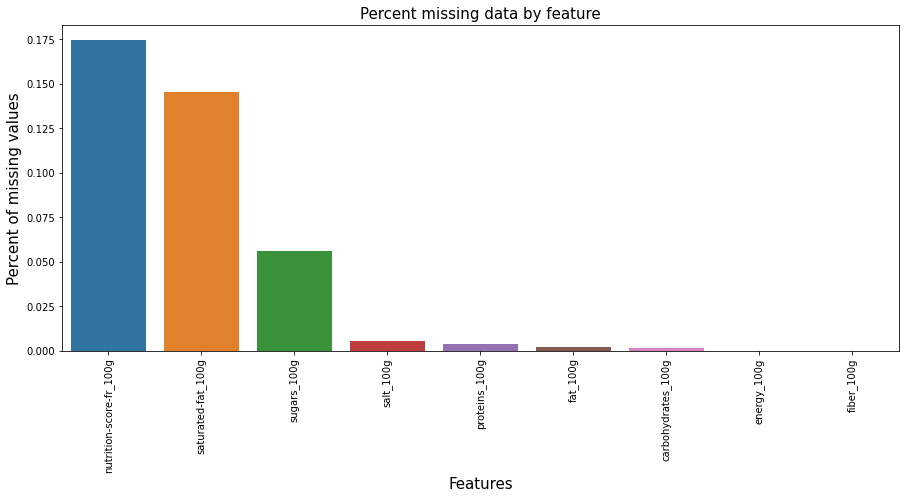

In [146]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()


 Isna() pour identifier les valeurs manquantes

<AxesSubplot:>

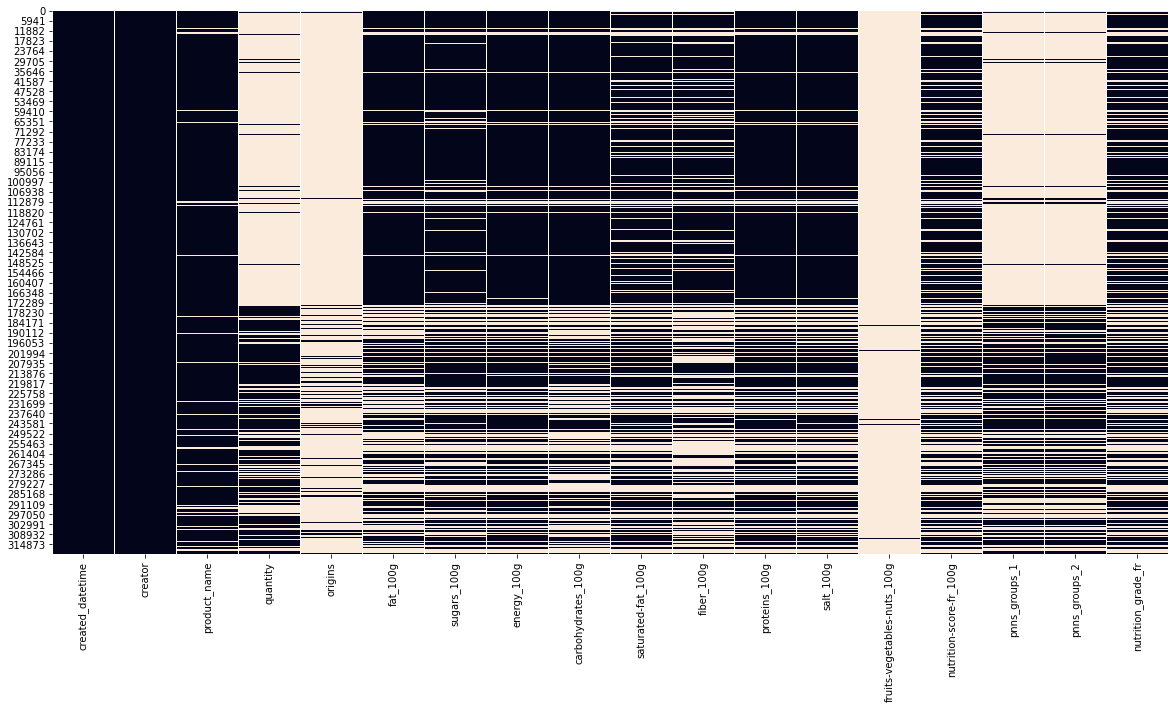

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

<img src='./oc_logo.png' width=15px /> Calculez le taux moyen de valeurs manquantes pour chacune des variables.

In [11]:
df.isna().mean().sort_values()

creator                        0.000006
created_datetime               0.000028
product_name                   0.055373
energy_100g                    0.185986
proteins_100g                  0.189699
salt_100g                      0.203453
sugars_100g                    0.236308
fat_100g                       0.239675
carbohydrates_100g             0.240620
saturated-fat_100g             0.284370
nutrition-score-fr_100g        0.310382
nutrition_grade_fr             0.310382
fiber_100g                     0.373742
quantity                       0.673229
pnns_groups_2                  0.705426
pnns_groups_1                  0.714710
origins                        0.930823
fruits-vegetables-nuts_100g    0.990535
dtype: float64

Nayant pas suffisament de données, on décide de retirer les features origins et fruits et vegetables, l'information était interessante à exploiter et les fruits, legume interessant pour le nutriscore, avec 99% de valeurs nulles. Nous preferons retirer cette feature

In [12]:
df.drop(['origins','fruits-vegetables-nuts_100g'], axis=1, inplace=True)

## feature Created datetime
On s'interesse maintenant à la feature Created datetime

In [13]:
df['created_datetime'] = df['created_datetime'].astype(str)

# Isoler les années avec la fonction split
df["Year"] = df['created_datetime'].apply(
    lambda x: x.split('-')[0])

In [14]:
# verification des date unique
df["Year"].nunique()

20

### Feature Created datetime

In [15]:
# nombre de dates
df["Year"].value_counts()

2017                         209379
2016                          47517
2015                          35631
2014                          13551
2013                          10162
2012                           4508
nan                               9
Carrefour market                  2
Auchan,Super U                    2
Auchan                            1
SuperU,Leclerc                    1
Leclerc                           1
SuperU                            1
Super U                           1
Super U,Leclerc,Carrefour         1
Banque alimentaire                1
Spar                              1
Cora                              1
Carrefour                         1
Dia,Sogeres                       1
Name: Year, dtype: int64

On remarque des noms de produits ayant un nom de pays : Belgique,France,Suisse
<br> Egalement que les quantités ne sont ni en gramme ni en Litre

In [16]:
df[df["Year"]=='nan']

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year
187478,nan,marianne,Lulu la barquette (Fraise),120 g,2.1,60.0,1480.0,78.0,0.5,1.2,4.200,0.08,13.0,Sugary snacks,Biscuits and cakes,d,nan
189068,nan,villecomtal-sur-arros-gers-france,"Belgique,France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
189109,nan,villecomtal-sur-arros-gers-france,"Belgique,France,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
189160,nan,villecomtal-sur-arros-gers-france,France,"Lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN,NaN,NaN,nan
189168,nan,villecomtal-sur-arros-gers-france,France,"Lait, lait, crème, lactiques",NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN,NaN,NaN,nan
189248,nan,villecomtal-sur-arros-gers-france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN,NaN,NaN,nan
189362,nan,villecomtal-sur-arros-gers-france,France,"lait, lait, lait, lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,0.180,NaN,NaN,NaN,NaN,NaN,nan
189379,nan,villecomtal-sur-arros-gers-france,France,"Lait, lait, lait, lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,0.149,NaN,NaN,NaN,NaN,NaN,nan
189417,nan,villecomtal-sur-arros-gers-france,France,"Lait, lait, lait, lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,nan


In [17]:
df[df["Year"]=='Carrefour market']

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year
189242,Carrefour market,villecomtal-sur-arros-gers-france,France,"Lait, lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carrefour market
189244,Carrefour market,villecomtal-sur-arros-gers-france,France,"Lait, lait, lait, lait",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carrefour market


### Valeurs aberrantes : created_datetime	

In [18]:
Année=['2017','2016','2015','2014','2013','2012']

In [19]:
df = df[df['Year'].isin(Année)]

In [20]:
df.shape

(320748, 17)

In [21]:
df.shape

(320748, 17)

### Définir une année de référence pour notre étude

In [22]:
# Isoler les années avec la fonction split
df["Date"] = df['created_datetime'].apply(
    lambda x: x.split('T')[0])

In [23]:
# To datetime au lieu STR
df.Date = pd.to_datetime(df.Date)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320748 entries, 0 to 320771
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   created_datetime         320748 non-null  object        
 1   creator                  320746 non-null  object        
 2   product_name             302986 non-null  object        
 3   quantity                 104799 non-null  object        
 4   fat_100g                 243890 non-null  float64       
 5   sugars_100g              244970 non-null  float64       
 6   energy_100g              261112 non-null  float64       
 7   carbohydrates_100g       243587 non-null  float64       
 8   saturated-fat_100g       229553 non-null  float64       
 9   fiber_100g               200885 non-null  float64       
 10  proteins_100g            259905 non-null  float64       
 11  salt_100g                255509 non-null  float64       
 12  nutrition-score-

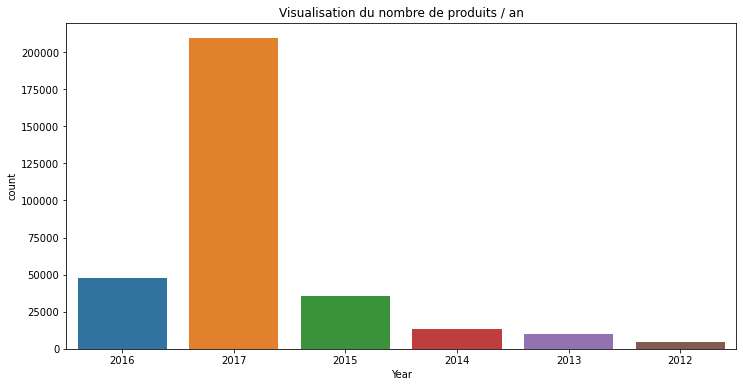

In [25]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x=df["Year"]).set(title='Visualisation du nombre de produits / an')
plt.show()

In [26]:
nb_produit_an = df.groupby('Year')[
    'product_name'].count()
nb_produit_an

Year
2012      4483
2013     10010
2014     13108
2015     32817
2016     38581
2017    203987
Name: product_name, dtype: int64

On étudiera l'année 2017, l'année avec le plus grand nombre de donnée mais aussi la plus recente

### Filtre année de référence

In [27]:
Année_ref = '2017'

In [28]:
df = df[df["Year"] == Année_ref]

In [29]:
df.shape

(209379, 18)

In [30]:
df.head()

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year,Date
1,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,28.57,14.29,2243.0,64.29,28.57,3.6,3.57,0.00000,14.0,NaN,NaN,d,2017,2017-03-09
2,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,NaN,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,NaN,NaN,b,2017,2017-03-09
3,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,NaN,57.14,3.57,2540.0,17.86,5.36,7.1,17.86,1.22428,12.0,NaN,NaN,d,2017,2017-03-09
4,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,NaN,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,2017,2017-03-09
5,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,NaN,18.27,11.54,1933.0,63.46,1.92,7.7,13.46,NaN,NaN,NaN,NaN,NaN,2017,2017-03-09


In [31]:
df_produit_mois = df.groupby('Date')[
    'product_name'].count()

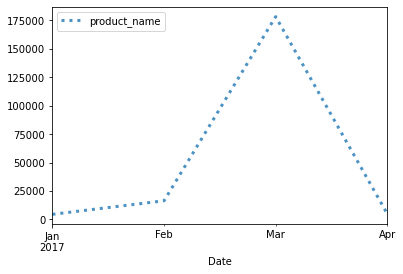

In [32]:
df_produit_mois = pd.DataFrame(df_produit_mois)
df_produit_mois = df_produit_mois.resample('M').sum().plot(
    label='nombre de produits', lw=3, ls=':', alpha=0.8)

Nos données pour 2017 vont seulement jusqu'à Avri, Interessons nous au mois de Mars 2017 pour comprendre précisement pourquoi il y a une aussi grosse volumétrie de donnée enregistrée

In [33]:
df_produit_jour = df.groupby('Date')[
    'product_name'].count()

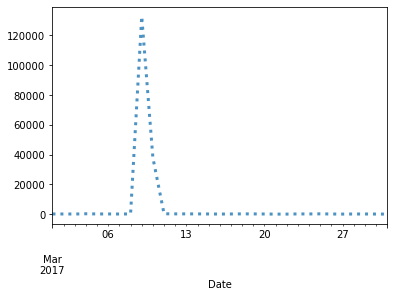

In [34]:
df_produit_jour = df_produit_jour.loc['2017-03-01':'2017-03-31'].plot(
    label='nombre de produits', lw=3, ls=':', alpha=0.8)

<AxesSubplot:>

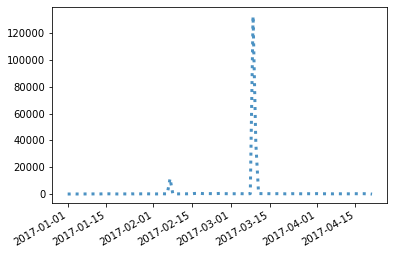

In [35]:
# nombre de dates
df["Date"].value_counts().plot(
    label='nombre de produits', lw=3, ls=':', alpha=0.8)

In [36]:
df.head()

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year,Date
1,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,28.57,14.29,2243.0,64.29,28.57,3.6,3.57,0.00000,14.0,NaN,NaN,d,2017,2017-03-09
2,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,NaN,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,NaN,NaN,b,2017,2017-03-09
3,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,NaN,57.14,3.57,2540.0,17.86,5.36,7.1,17.86,1.22428,12.0,NaN,NaN,d,2017,2017-03-09
4,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,NaN,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,2017,2017-03-09
5,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,NaN,18.27,11.54,1933.0,63.46,1.92,7.7,13.46,NaN,NaN,NaN,NaN,NaN,2017,2017-03-09


### Filtre sur le 09-03-2017

In [37]:
df=df.set_index('Date')

In [38]:
df_a_verif = df.loc['2017-03-09':'2017-03-10']

In [39]:
df_a_verif.head()

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year
Date,,,,,,,,,,,,,,,,,
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,28.57,14.29,2243.0,64.29,28.57,3.6,3.57,0.00000,14.0,NaN,NaN,d,2017
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,NaN,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,NaN,NaN,b,2017
2017-03-09,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,NaN,57.14,3.57,2540.0,17.86,5.36,7.1,17.86,1.22428,12.0,NaN,NaN,d,2017
2017-03-09,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,NaN,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,2017
2017-03-09,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,NaN,18.27,11.54,1933.0,63.46,1.92,7.7,13.46,NaN,NaN,NaN,NaN,NaN,2017


In [40]:
# Isoler les heures minnutes secondes avec la fonction split
df_a_verif["Time"] = df_a_verif['created_datetime'].apply(
    lambda x: x.split('T')[1])

In [41]:
df_a_verif["Time"] = df_a_verif["Time"].apply(
    lambda x: x.replace('Z',''))

In [42]:
df_a_verif.head()

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year,Time
Date,,,,,,,,,,,,,,,,,,
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,28.57,14.29,2243.0,64.29,28.57,3.6,3.57,0.00000,14.0,NaN,NaN,d,2017,14:32:37
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,NaN,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,NaN,NaN,b,2017,14:32:37
2017-03-09,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,NaN,57.14,3.57,2540.0,17.86,5.36,7.1,17.86,1.22428,12.0,NaN,NaN,d,2017,10:35:31
2017-03-09,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,NaN,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,2017,10:34:13
2017-03-09,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,NaN,18.27,11.54,1933.0,63.46,1.92,7.7,13.46,NaN,NaN,NaN,NaN,NaN,2017,10:34:11


In [43]:
# To datetime au lieu STR
df_a_verif.Time = pd.to_datetime(df_a_verif.Time)

In [44]:
df_a_verif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170485 entries, 2017-03-09 to 2017-03-09
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   created_datetime         170485 non-null  object        
 1   creator                  170485 non-null  object        
 2   product_name             170415 non-null  object        
 3   quantity                 158 non-null     object        
 4   fat_100g                 169521 non-null  float64       
 5   sugars_100g              158971 non-null  float64       
 6   energy_100g              169947 non-null  float64       
 7   carbohydrates_100g       169652 non-null  float64       
 8   saturated-fat_100g       144395 non-null  float64       
 9   fiber_100g               138908 non-null  float64       
 10  proteins_100g            169450 non-null  float64       
 11  salt_100g                169546 non-null  float64       
 12  

In [45]:
df_verif_produit = df_a_verif.groupby('Time')[
    'product_name'].count()

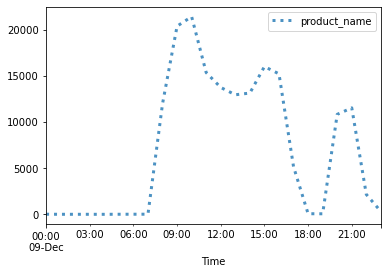

In [46]:
df_verif_produit = pd.DataFrame(df_verif_produit)
df_verif_produit = df_verif_produit.resample('1H').sum().plot(
    label='nombre de produits', lw=3, ls=':', alpha=0.8)

In [47]:
df_a_verif.head()

,created_datetime,creator,product_name,quantity,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,Year,Time
Date,,,,,,,,,,,,,,,,,,
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,28.57,14.29,2243.0,64.29,28.57,3.6,3.57,0.00000,14.0,NaN,NaN,d,2017,2022-12-09 14:32:37
2017-03-09,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,NaN,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,NaN,NaN,b,2017,2022-12-09 14:32:37
2017-03-09,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,NaN,57.14,3.57,2540.0,17.86,5.36,7.1,17.86,1.22428,12.0,NaN,NaN,d,2017,2022-12-09 10:35:31
2017-03-09,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,NaN,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,2017,2022-12-09 10:34:13
2017-03-09,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,NaN,18.27,11.54,1933.0,63.46,1.92,7.7,13.46,NaN,NaN,NaN,NaN,NaN,2017,2022-12-09 10:34:11


In [48]:
df_a_verif['creator'].value_counts()

usda-ndb-import               169868
kiliweb                          423
openfoodfacts-contributors        88
date-limite-app                   41
kakao                             17
teolemon                           6
agamitsudo                         6
smias                              6
julie-yuka                         3
bleakpatch                         3
ashed                              2
anticultist                        2
actarus-75                         2
offheidelberg                      2
b7                                 2
guigzz                             2
mikedafish                         1
orceus                             1
99fran                             1
kalepom                            1
drunkenbison                       1
afrom31                            1
sophiecool62                       1
phoenix                            1
epn-draguignan                     1
narcose                            1
flo25                              1
a

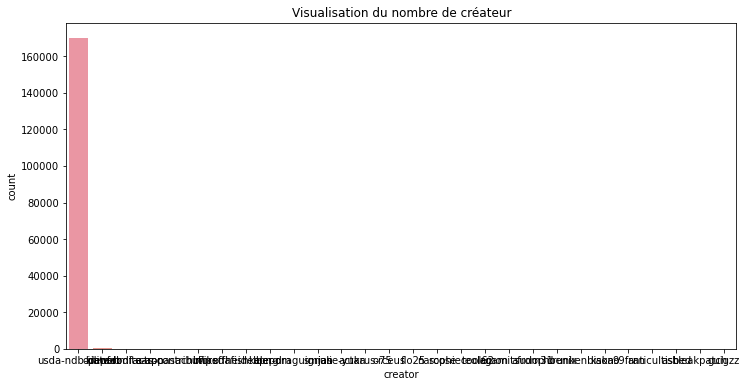

In [49]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x=df_a_verif["creator"]).set(title='Visualisation du nombre de créateur')
plt.show()

### Filtre sur le USDA 

La base de données nationale sur les éléments nutritifs de l'USDA pour référence standard est une base de données produite par le ministère de l'Agriculture des États-Unis qui fournit le contenu nutritionnel de nombreux aliments génériques et de marque exclusive. Wikipédia (anglais)

In [50]:
df_usda = df[df["creator"] == 'usda-ndb-import']
df_usda.shape

(169868, 17)

In [51]:
df_others = df[df["creator"] != 'usda-ndb-import']
df_others.shape

(39511, 17)

### Analyse des deux DF  en terme de valeurs manquantes

In [52]:
df_usda.isna().mean().sort_values()

created_datetime           0.000000
Year                       0.000000
creator                    0.000000
product_name               0.000259
carbohydrates_100g         0.001613
energy_100g                0.002343
fat_100g                   0.002355
salt_100g                  0.004674
proteins_100g              0.005263
sugars_100g                0.066946
saturated-fat_100g         0.152742
fiber_100g                 0.184879
nutrition_grade_fr         0.189865
nutrition-score-fr_100g    0.189865
pnns_groups_1              0.999729
pnns_groups_2              0.999729
quantity                   0.999882
dtype: float64

<AxesSubplot:ylabel='Date'>

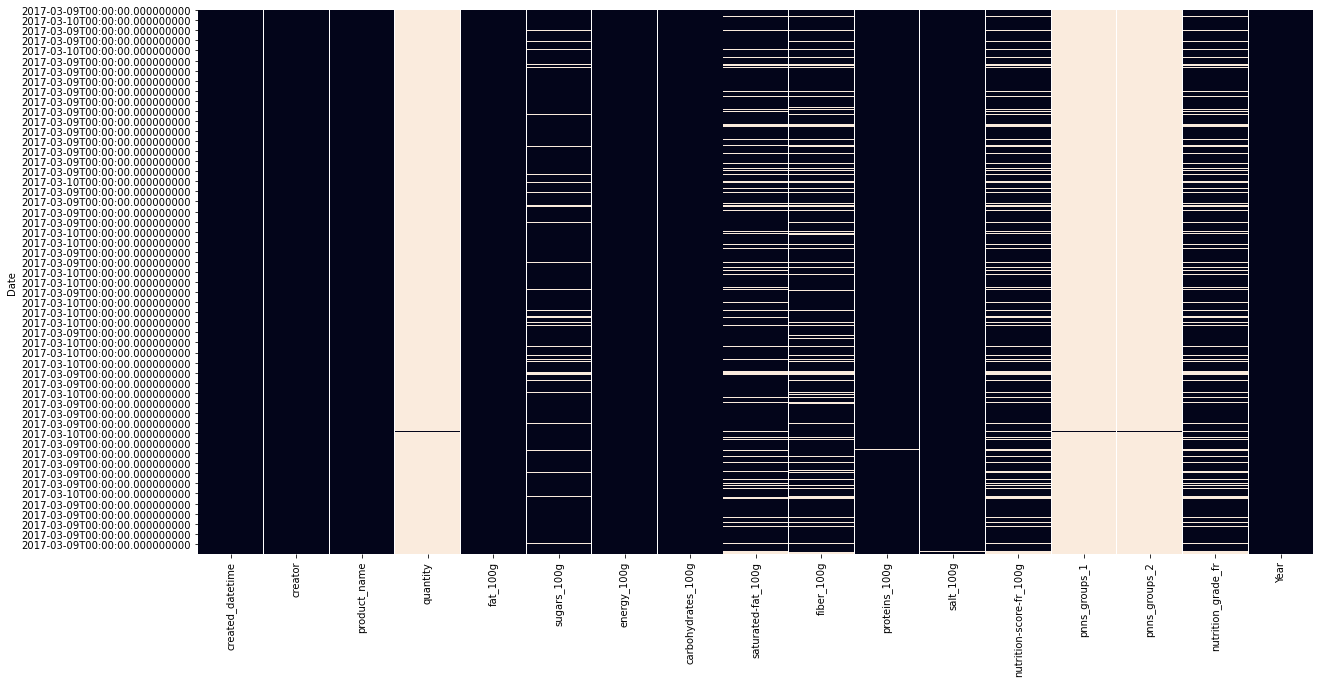

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df_usda.isna(), cbar=False)

In [54]:
df_others.isna().mean().sort_values()

created_datetime           0.000000
Year                       0.000000
creator                    0.000000
product_name               0.135355
energy_100g                0.310648
proteins_100g              0.312546
sugars_100g                0.334742
salt_100g                  0.342917
saturated-fat_100g         0.346916
nutrition_grade_fr         0.361849
nutrition-score-fr_100g    0.361849
fiber_100g                 0.428286
carbohydrates_100g         0.630230
fat_100g                   0.630457
quantity                   0.643517
pnns_groups_2              0.778315
pnns_groups_1              0.782061
dtype: float64

<AxesSubplot:ylabel='Date'>

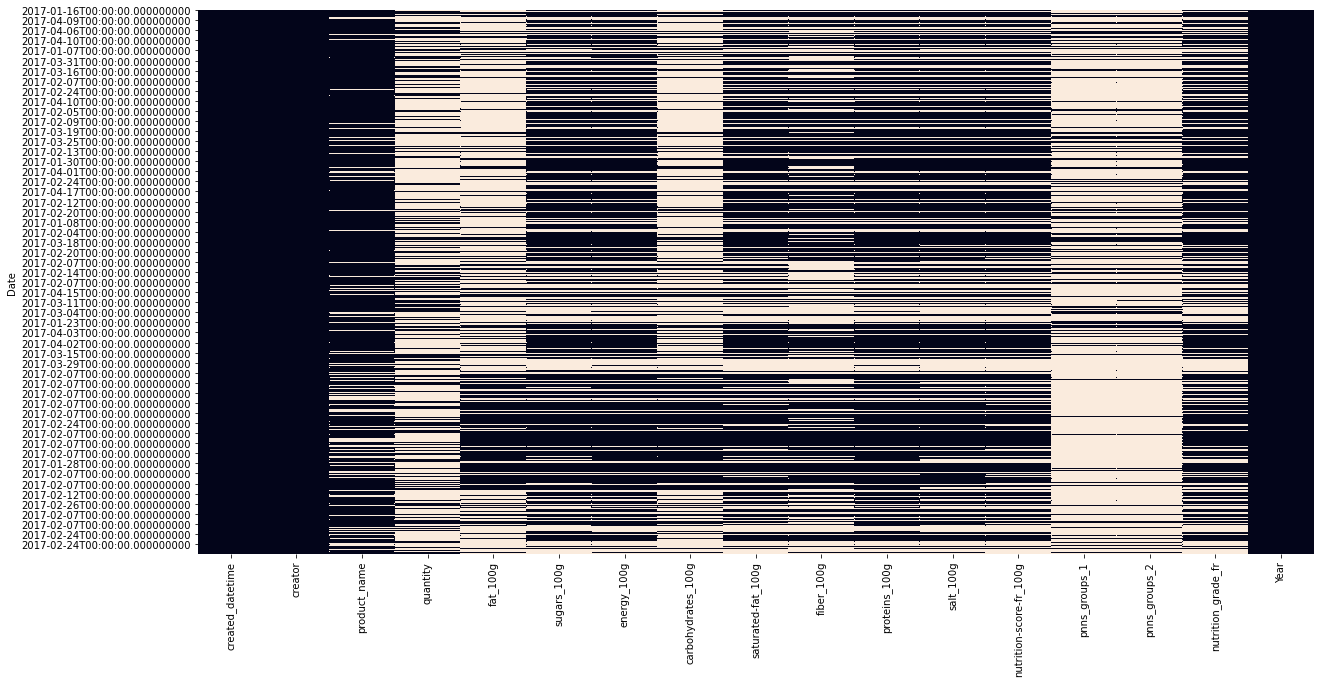

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df_others.isna(), cbar=False)

Les données **USDA National Nutrient Database** : La base de données nationale sur les éléments nutritifs de l'USDA pour référence standard est une base de données produite par le ministère de l'Agriculture des États-Unis qui fournit le contenu nutritionnel de nombreux aliments génériques et de marque exclusive.
<br> **Les données provenant d'USDA semblent plus volumineuses, moins de valeurs manquantes. 

### Feature Quantity

In [56]:
df_usda['quantity'].isna().sum()

169848

In [57]:
df_usda['quantity'].nunique()

16

In [58]:
df_usda['quantity'].value_counts()

454 g               3
425 g               2
439 g               2
240 g (6 x 40 g)    1
400 g               1
680 g               1
737 g               1
595.3 g             1
15 oz, 425 g        1
1 Quart (946 ml)    1
1 kg                1
50 g                1
237 ml              1
450 ml              1
240 g               1
15 oz, 425g         1
Name: quantity, dtype: int64

feature numerique pouvant etre interessante, maleureusement trop de données manques

### Feature Pnns group1

In [59]:
df_usda['pnns_groups_1'].isna().sum()

169822

In [60]:
df_usda['pnns_groups_1'].nunique()

5

In [61]:
df_usda['pnns_groups_1'].value_counts()

unknown            35
Fat and sauces      4
Sugary snacks       3
Composite foods     2
Beverages           2
Name: pnns_groups_1, dtype: int64

feature categorielle pouvant etre interessante, maleureusement trop de données manques et unknown

### Feature Pnns group2

In [62]:
df_usda['pnns_groups_2'].isna().sum()

169822

In [63]:
df_usda['pnns_groups_2'].nunique()

7

In [64]:
df_usda['pnns_groups_2'].value_counts()

unknown                  35
Dressings and sauces      3
One-dish meals            2
Sweets                    2
Non-sugared beverages     2
Biscuits and cakes        1
Fats                      1
Name: pnns_groups_2, dtype: int64

mm constat que pour pnns_1, feature categorielle pouvant etre interessante, maleureusement trop de données manques et unknown

### Supression de features
Les taux de valeurs manquantes à 99% pour 3 features
* pnns_groups_1             **0.999729**
* pnns_groups_2              **0.999729**
* quantity                  **0.999882**

<br>
On décide tout naturellement de retirer ces 3 features de notre DF
<br>
Nous allons également retirer toutes les features ne servant pas à l'exploration et à l'analyse. Je pense à created_Datatime et creator. Les filtres sur ces deux features ayant deja été faits

In [65]:
df_usda = df_usda.reset_index()

In [66]:
df_usda.drop(['quantity','Date','created_datetime',"creator",'pnns_groups_1','pnns_groups_2','Year'], axis=1,inplace=True)

<AxesSubplot:>

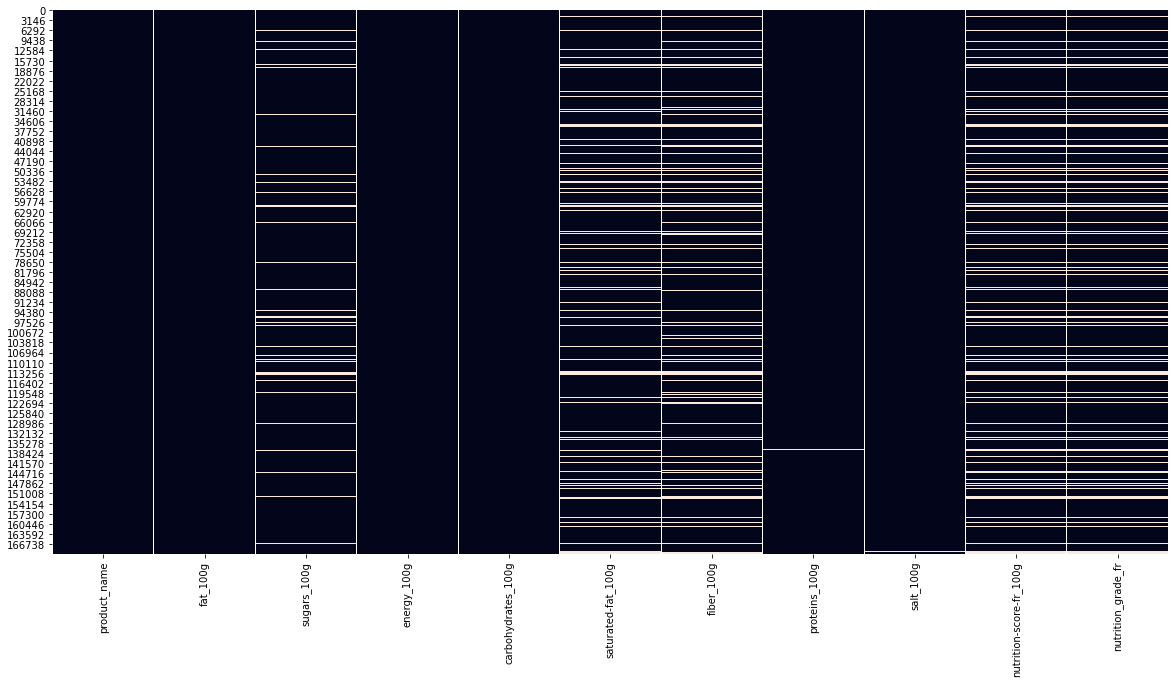

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df_usda.isna(), cbar=False)

In [68]:
df_usda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169868 entries, 0 to 169867
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             169824 non-null  object 
 1   fat_100g                 169468 non-null  float64
 2   sugars_100g              158496 non-null  float64
 3   energy_100g              169470 non-null  float64
 4   carbohydrates_100g       169594 non-null  float64
 5   saturated-fat_100g       143922 non-null  float64
 6   fiber_100g               138463 non-null  float64
 7   proteins_100g            168974 non-null  float64
 8   salt_100g                169074 non-null  float64
 9   nutrition-score-fr_100g  137616 non-null  float64
 10  nutrition_grade_fr       137616 non-null  object 
dtypes: float64(9), object(2)
memory usage: 14.3+ MB


### Duplicated

In [69]:
df_usda[df_usda.duplicated()]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
145,Peanuts,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,b
250,"The Madelaine Chocolate Company, Solid Milk Ch...",33.33,55.56,2326.0,58.33,19.44,2.8,8.33,0.21082,23.0,e
282,"Emojeez, Gummies Candy, Fruit",0.00,40.00,1151.0,67.50,0.00,0.0,5.00,0.03048,11.0,d
306,"Pb&J Trail Mix, Grape",25.88,44.71,1971.0,51.76,8.24,4.7,9.41,0.47752,19.0,e
314,Fruit Gummies,0.00,37.50,1255.0,70.00,0.00,0.0,7.50,0.09652,11.0,d
...,...,...,...,...,...,...,...,...,...,...,...
169854,Blueberry Chia Buckwheat Muesli,10.53,15.79,1690.0,66.67,4.39,8.8,12.28,0.04572,7.0,c
169855,Chipotle Peppers In Adobo Sauce,0.00,6.67,280.0,16.67,0.00,10.0,0.00,3.21818,6.0,c
169856,Dal Makhani,5.33,0.00,502.0,13.33,1.00,2.0,4.67,1.37160,2.0,b
169861,"Sour Licorice Twists, Sour Cherry",1.25,32.50,1360.0,72.50,NaN,0.0,2.50,0.00000,NaN,NaN


Drop duplicated

In [70]:
df_usda = df_usda.drop_duplicates()

In [71]:
df_usda.shape

(151841, 11)

### Valeurs aberrantes : Feature Numerique 100G
#### fat_100g  

In [72]:
df_usda['fat_100g'].min()

0.0

In [73]:
df_usda['fat_100g'].max()

714.29

<AxesSubplot:xlabel='fat_100g'>

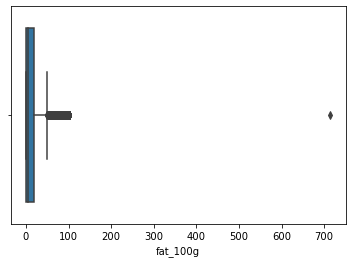

In [74]:
sns.boxplot(df_usda['fat_100g'])

In [75]:
df_usda.loc[df_usda['fat_100g']>100,'fat_100g'] = np.nan

<AxesSubplot:xlabel='fat_100g'>

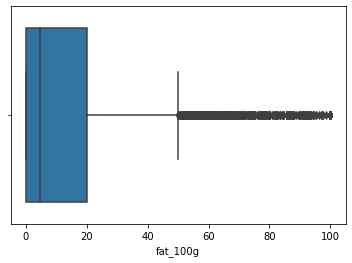

In [76]:
sns.boxplot(df_usda['fat_100g'])

#### sugars_100g

In [77]:
df_usda['sugars_100g'].min()

-17.86

In [78]:
df_usda['sugars_100g'].max()

3520.0

<AxesSubplot:xlabel='sugars_100g'>

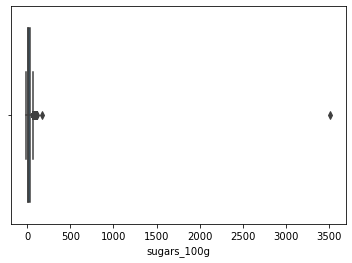

In [79]:
sns.boxplot(df_usda['sugars_100g'])

In [80]:
df_usda.loc[df_usda['sugars_100g']>100,'sugars_100g'] = np.nan
df_usda.loc[df_usda['sugars_100g']<0,'sugars_100g'] = np.nan

<AxesSubplot:xlabel='sugars_100g'>

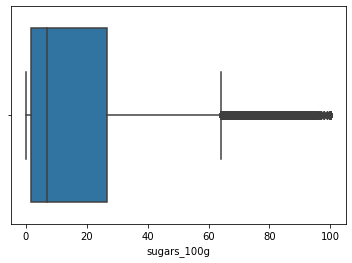

In [81]:
sns.boxplot(df_usda['sugars_100g'])

#### carbohydrates_100g 

In [82]:
df_usda['carbohydrates_100g'].min()

0.0

In [83]:
df_usda['carbohydrates_100g'].max()

2916.67

<AxesSubplot:xlabel='carbohydrates_100g'>

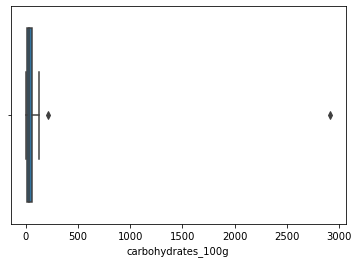

In [84]:
sns.boxplot(df_usda['carbohydrates_100g'])

In [85]:
df_usda.loc[df_usda['carbohydrates_100g']>100,'carbohydrates_100g'] = np.nan
df_usda.loc[df_usda['carbohydrates_100g']<0,'carbohydrates_100g'] = np.nan

<AxesSubplot:xlabel='carbohydrates_100g'>

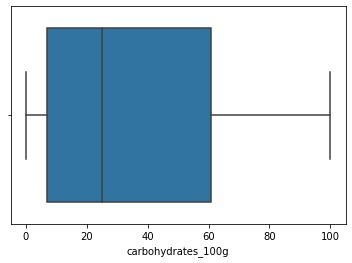

In [86]:
sns.boxplot(df_usda['carbohydrates_100g'])

#### fiber_100g 

In [87]:
df_usda['fiber_100g'].min()

-6.7

In [88]:
df_usda['fiber_100g'].max()

5380.0

<AxesSubplot:xlabel='fiber_100g'>

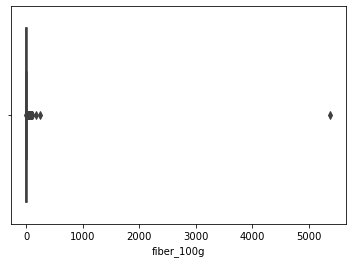

In [89]:
sns.boxplot(df_usda['fiber_100g'])

In [90]:
df_usda.loc[df_usda['fiber_100g']>100,'fiber_100g'] = np.nan
df_usda.loc[df_usda['fiber_100g']<0,'fiber_100g'] = np.nan

<AxesSubplot:xlabel='fiber_100g'>

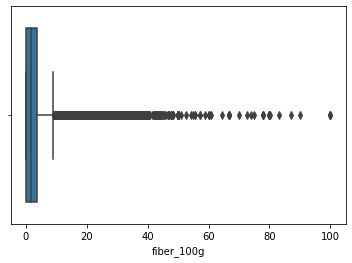

In [91]:
sns.boxplot(df_usda['fiber_100g'])

#### proteins_100g    

In [92]:
df_usda['proteins_100g'].min()

-800.0

In [93]:
df_usda['proteins_100g'].max()

430.0

<AxesSubplot:xlabel='proteins_100g'>

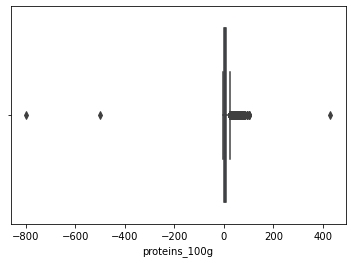

In [94]:
sns.boxplot(df_usda['proteins_100g'])

In [95]:
df_usda.loc[df_usda['proteins_100g']>100,'proteins_100g'] = np.nan
df_usda.loc[df_usda['proteins_100g']<0,'proteins_100g'] = np.nan

<AxesSubplot:xlabel='proteins_100g'>

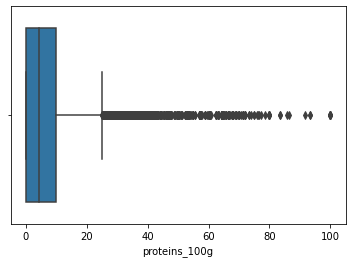

In [96]:
sns.boxplot(df_usda['proteins_100g'])

#### salt_100g   

In [97]:
df_usda['salt_100g'].min()

0.0

In [98]:
df_usda['salt_100g'].max()

64312.8

<AxesSubplot:xlabel='salt_100g'>

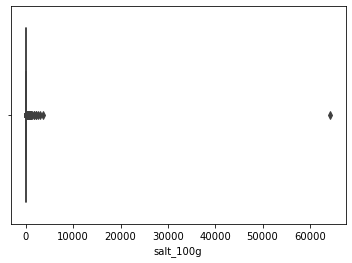

In [99]:
sns.boxplot(df_usda['salt_100g'])

In [100]:
df_usda.loc[df_usda['salt_100g']>100,'salt_100g'] = np.nan
df_usda.loc[df_usda['salt_100g']<0,'salt_100g'] = np.nan

<AxesSubplot:xlabel='salt_100g'>

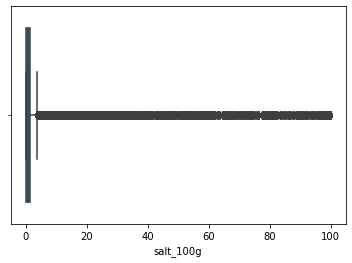

In [101]:
sns.boxplot(df_usda['salt_100g'])

### Feature Energy_100g
Quelle unitée de mesure Cal ou Joules

In [102]:
df_usda['energy_100g'].describe()

count    151447.000000
mean       1134.442527
std        1054.426046
min           0.000000
25%         372.000000
50%        1151.000000
75%        1674.000000
max      231199.000000
Name: energy_100g, dtype: float64

In [103]:
df_usda[df_usda['product_name']=='Cookies']

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
3523,Cookies,25.00,35.71,2092.0,64.29,17.86,3.6,3.57,0.86106,21.0,e
9963,Cookies,23.33,26.67,1954.0,63.33,8.33,0.0,3.33,0.55118,20.0,e
9966,Cookies,20.00,26.67,1954.0,63.33,5.00,0.0,3.33,0.50800,16.0,d
14895,Cookies,21.43,39.29,1941.0,64.29,17.86,3.6,3.57,0.54356,20.0,e
14902,Cookies,21.43,42.86,1941.0,67.86,16.07,3.6,3.57,0.49784,21.0,e
17899,Cookies,20.00,30.00,1954.0,66.67,3.33,0.0,6.67,0.80518,17.0,d
17900,Cookies,16.67,33.33,1812.0,70.00,5.00,0.0,3.33,0.76200,19.0,e
20421,Cookies,17.65,38.24,1845.0,67.65,8.82,5.9,2.94,1.19634,21.0,e
20422,Cookies,17.65,38.24,1845.0,67.65,8.82,2.9,2.94,1.34366,22.0,e
20423,Cookies,23.53,32.35,1971.0,64.71,10.29,5.9,5.88,1.27000,22.0,e


Selon USDA, Le cookie correspond à environ 502 calories soit environ 2100 Joules; Nous pouvons admettre qu'il semble que nos données soient en Joule

Parmi les aliments les plus caloriques, on retrouve les graisses d’origine animale
Ce type de graisse se caractérise par une forte teneur en gras saturé, source de cholestérol, tout en étant dépourvu de nutriments intéressants. L’huile de poisson et le lard par exemple apportent près de 900 calories par 100 grammes soit 3800 J pour 100g

In [104]:
df_usda['energy_100g'].min()

0.0

In [105]:
df_usda['energy_100g'].max()

231199.0

<AxesSubplot:xlabel='energy_100g'>

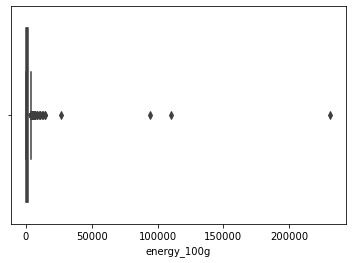

In [106]:
sns.boxplot(df_usda['energy_100g'])

In [107]:
df_usda.loc[df_usda['energy_100g']>3800,'energy_100g'] = np.nan
df_usda.loc[df_usda['energy_100g']<0,'energy_100g'] = np.nan

<AxesSubplot:xlabel='energy_100g'>

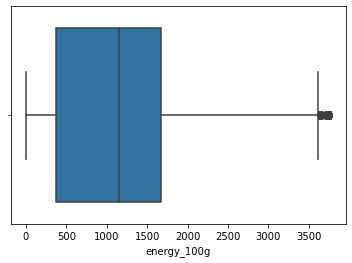

In [108]:
sns.boxplot(df_usda['energy_100g'])

#### Drop valeurs NaN Energy

In [109]:
df_usda.isna().mean().sort_values()

product_name               0.000231
carbohydrates_100g         0.001798
fat_100g                   0.002615
energy_100g                0.004044
proteins_100g              0.005815
salt_100g                  0.005907
sugars_100g                0.060985
saturated-fat_100g         0.147437
fiber_100g                 0.174650
nutrition-score-fr_100g    0.180623
nutrition_grade_fr         0.180623
dtype: float64

In [110]:
df_usda.dropna(subset=['energy_100g'],inplace=True)

### Feature Product name

In [111]:
df_usda['product_name'].nunique()

112994

In [112]:
df_usda.isna().mean().sort_values()

energy_100g                0.000000
product_name               0.000231
carbohydrates_100g         0.001594
fat_100g                   0.002447
proteins_100g              0.004139
salt_100g                  0.005707
sugars_100g                0.058554
saturated-fat_100g         0.147183
fiber_100g                 0.173745
nutrition-score-fr_100g    0.177984
nutrition_grade_fr         0.177984
dtype: float64

#### Drop NaN 

In [113]:
df_usda.dropna(subset=['product_name'],inplace=True)

### Feature nutrition-score-fr_100g et Nutrition grade
note > 40 et inférieure -15

* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [114]:
df_usda[df_usda['nutrition-score-fr_100g'] >40]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr


In [115]:
df_usda[df_usda['nutrition-score-fr_100g'] <-15]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr


<img src='./oc_logo.png' width=15px /> Vérififions que les **nutrition-score-fr_100g** et les **nutrition_grade_fr**	 sont correctement associés. Pour cela, croisez les variables dans un même tableau.
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [116]:
pd.crosstab(df_usda['nutrition-score-fr_100g'], df_usda['nutrition_grade_fr'])

nutrition_grade_fr,a,b,c,d,e
nutrition-score-fr_100g,,,,,
-10.0,18,0,0,0,0
-9.0,88,0,0,0,0
-8.0,179,0,0,0,0
-7.0,402,0,0,0,0
-6.0,2788,0,0,0,0
-5.0,1826,0,0,0,0
-4.0,2213,0,0,0,0
-3.0,2904,0,0,0,0
-2.0,3452,0,0,0,0


### Imputation données manquantes Feature 'fiber_100g '

In [117]:
df_usda['fiber_100g'] = df_usda['fiber_100g'].fillna(0)

<AxesSubplot:>

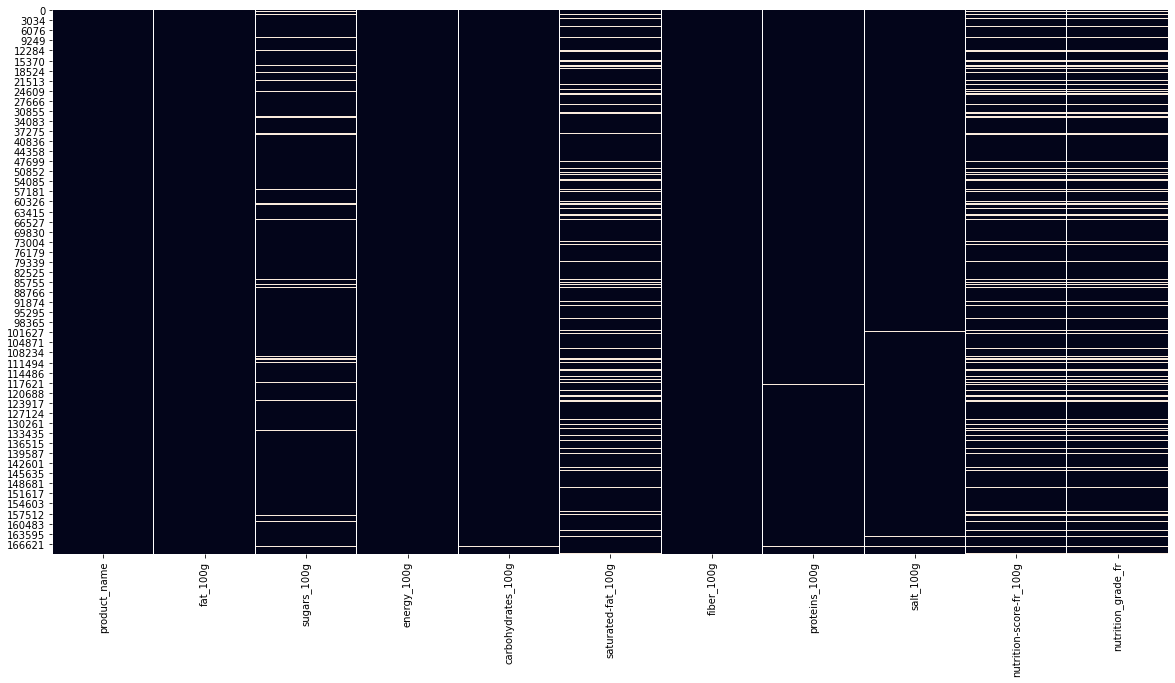

In [118]:
plt.figure(figsize=(20,10))
sns.heatmap(df_usda.isna(), cbar=False)

### Produits dupliqués

Visualisation des données 'product_name' dupliquées

In [119]:
df_usda['product_name'].value_counts()

Ice Cream                                      384
Potato Chips                                   221
Premium Ice Cream                              204
Cookies                                        139
Popcorn                                        131
                                              ... 
Marshmallow Cookies                              1
Whole Wheat Penne With Red Pepper Sauce          1
Cajohns, Picante Sauce, Gourmet Salsa, Mild      1
Butter Candy Glazed Macadamias                   1
Spicy Oyster Flavored Sauce                      1
Name: product_name, Length: 112994, dtype: int64

In [120]:
df_usda[df_usda.duplicated(subset=['product_name'],keep=False)]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
1,Peanuts,17.86,17.86,1941.0,60.71,0.00,7.1,17.86,0.63500,0.0,b
3,Organic Polenta,1.43,NaN,1552.0,77.14,NaN,5.7,8.57,NaN,NaN,NaN
5,Organic Long Grain White Rice,NaN,NaN,1490.0,80.00,NaN,0.0,8.89,NaN,NaN,NaN
6,Organic Muesli,18.75,15.62,1833.0,57.81,4.69,9.4,14.06,0.13970,7.0,c
8,Organic Sunflower Oil,100.00,NaN,3586.0,NaN,7.14,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169834,Salsa,0.00,3.57,151.0,7.14,NaN,0.0,0.00,1.27000,NaN,NaN
169840,Mackerel In Tomato Sauce,14.29,1.79,820.0,1.79,8.93,1.8,12.50,0.68072,10.0,c
169841,Sardines In Extra Virgin Olive Oil,23.21,0.00,1197.0,7.14,5.36,0.0,14.29,0.90678,11.0,d
169857,Smoked Gouda Cheese,32.14,NaN,1644.0,NaN,21.43,0.0,25.00,2.35966,NaN,NaN


In [121]:
df_usda.shape

(151192, 11)

### Imputation produit par la moyenne des produits 

In [122]:
df_usda = df_usda.groupby("product_name")[["fat_100g", "sugars_100g", "energy_100g", "carbohydrates_100g",
                                             "saturated-fat_100g", "fiber_100g", "proteins_100g", "salt_100g",
                                            "nutrition-score-fr_100g"]].agg(lambda x: x.mean())

df_usda.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
product_name,,,,,,,,,
"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0
"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0
"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0
"!, Gummie Flower",0.00,47.50,1255.0,72.50,0.00,0.0,5.00,0.06350,13.0
"!, Halloween Mix Whole Wheat Cookies",30.00,25.00,2301.0,55.00,20.00,5.0,5.00,0.82550,19.0


In [123]:
df_usda = df_usda.reset_index()

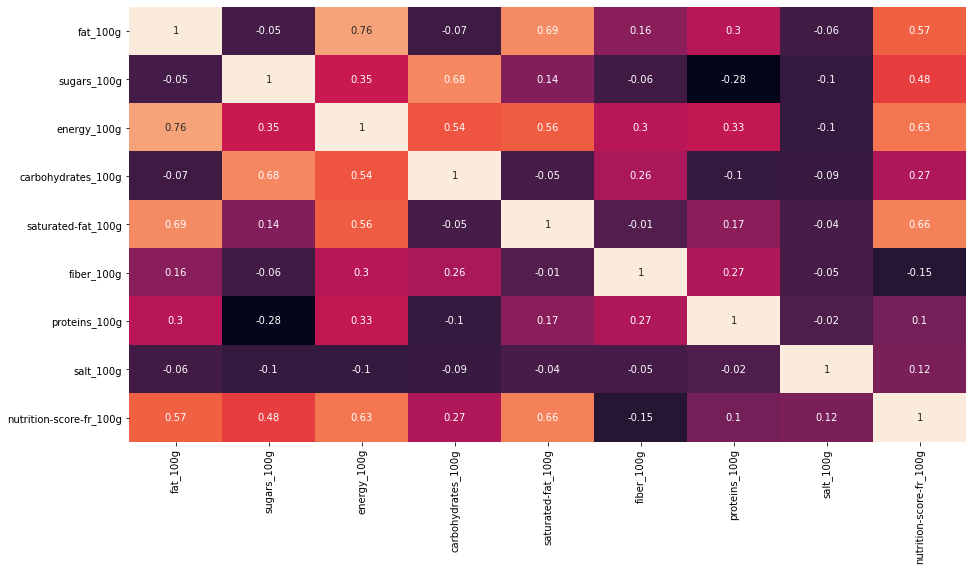

In [124]:
plt.figure(figsize=(15, 8))
correlation_matrix = df_usda.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cbar=None);

### KNN imputer valeurs manquantes

In [125]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [126]:
df=df_usda.select_dtypes('number')

In [127]:
imputer = KNNImputer(n_neighbors = 1)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0
1,21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0
2,0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0
3,0.00,47.50,1255.0,72.50,0.00,0.0,5.00,0.06350,13.0
4,30.00,25.00,2301.0,55.00,20.00,5.0,5.00,0.82550,19.0


In [128]:
#check KNN imputation worked
df_imputed.isna().sum()

fat_100g                   0
sugars_100g                0
energy_100g                0
carbohydrates_100g         0
saturated-fat_100g         0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
dtype: int64

#### Choix du meilleur n neigbors pour le KNN Imputer? (n_neighbor=?)

In [129]:
#import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [130]:
# function for returning parameter k and RMSE for validation test

def optimize_k(data, target):
    errors = []
    for k in range(1, 10):
        print(f'feeding {k} into k')
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        #X to store input, Y for output
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
    print(f'done {k} jobs')
    return errors


In [131]:
k_errors = optimize_k(df, 'nutrition-score-fr_100g')

feeding 1 into k
feeding 2 into k
feeding 3 into k
feeding 4 into k
feeding 5 into k
feeding 6 into k
feeding 7 into k
feeding 8 into k
feeding 9 into k
done 9 jobs


In [132]:
k_errors

[{'K': 1, 'RMSE': 1.1451576299463817},
 {'K': 2, 'RMSE': 1.0903041423031168},
 {'K': 3, 'RMSE': 1.0485260187964782},
 {'K': 4, 'RMSE': 1.023626568148241},
 {'K': 5, 'RMSE': 1.0248870849432339},
 {'K': 6, 'RMSE': 1.0246514291930762},
 {'K': 7, 'RMSE': 1.0162624495320605},
 {'K': 8, 'RMSE': 1.0170843628794313},
 {'K': 9, 'RMSE': 1.0167485573067623}]

In [133]:
#Parameter k with min RMSE (best performance)
minRMSE = min(k_errors, key=lambda x:x['RMSE'])
minRMSE

{'K': 7, 'RMSE': 1.0162624495320605}

Text(0, 0.5, 'RMSE')

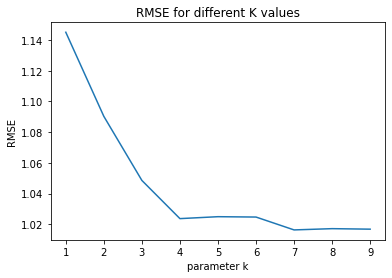

In [134]:
# visualization
k = []
RMSE = []

for i in range(len(k_errors)):
    iteration = list(k_errors[i].values())
    k.append(iteration[0])
    RMSE.append(iteration[1])

plt.plot(k, RMSE)
plt.title('RMSE for different K values')
plt.xlabel('parameter k')
plt.ylabel('RMSE')

### Création de la feature "nutrition_grade_fr"
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [135]:
def nutrition_grade(x):
    if x >=-15 and x <=-1 :
        return 'A'
    elif x >=-0 and x <=2 :
        return 'B'
    elif x >=3 and x <=10:
        return 'C'
    elif x >=11 and x <=18 :
        return 'D'
    else:
         return 'E'

In [136]:
df_usda["nutrition_grade_fr"] = df_usda['nutrition-score-fr_100g'].apply(nutrition_grade)

In [137]:
df_usda

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0,E
1,"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0,E
2,"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0,B
3,"!, Gummie Flower",0.00,47.50,1255.0,72.50,0.00,0.0,5.00,0.06350,13.0,D
4,"!, Halloween Mix Whole Wheat Cookies",30.00,25.00,2301.0,55.00,20.00,5.0,5.00,0.82550,19.0,E
...,...,...,...,...,...,...,...,...,...,...,...
112989,"Zweigle's, Hot Dog Sauce",0.00,20.00,418.0,26.67,0.00,0.0,0.00,2.54000,15.0,D
112990,Zwieback - Rusk,5.26,15.79,1540.0,78.95,2.63,5.3,10.53,0.73406,7.0,C
112991,Zwieback Snack Toast,5.00,10.00,1674.0,60.00,0.00,10.0,10.00,1.27000,6.0,C
112992,"Zymbom, Energy Drink With Taurine",0.00,10.80,184.0,11.20,NaN,0.0,0.40,0.20320,NaN,E


Verfification df_usda unique()

In [138]:
df_usda[df_usda['product_name']=='Ice Cream']

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
48251,Ice Cream,11.611146,21.308177,925.039062,26.540026,7.043681,0.519531,3.58125,0.216985,12.558747,D


<AxesSubplot:>

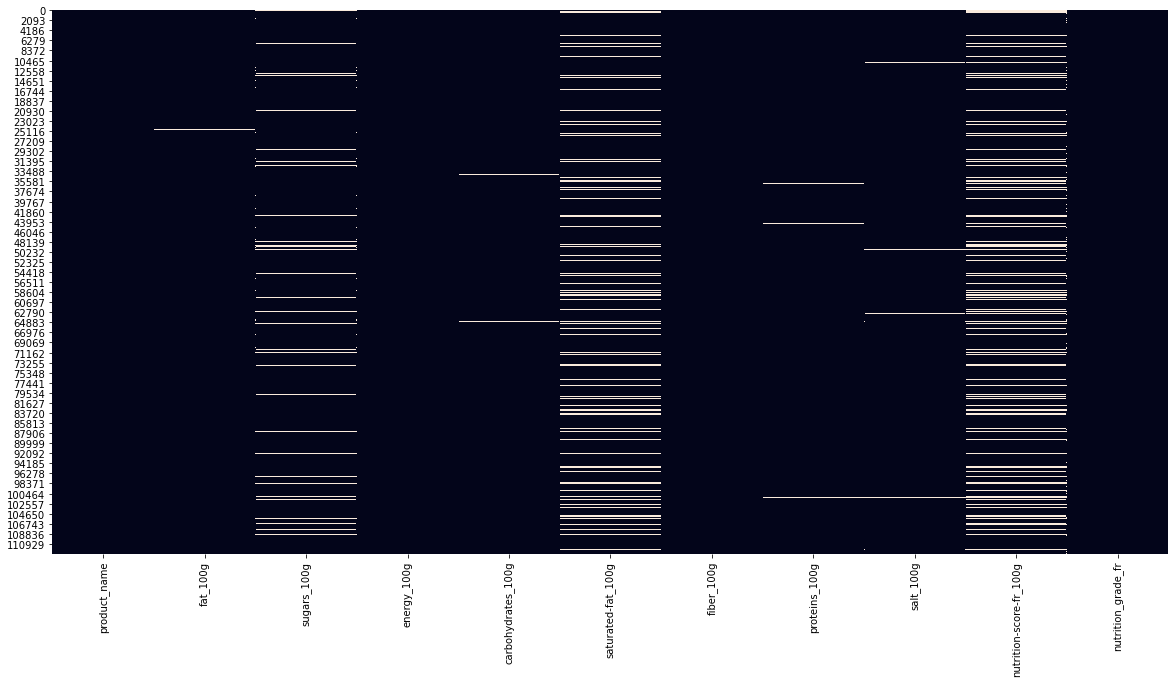

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df_usda.isna(), cbar=False)

In [140]:
df_usda.isna().mean().sort_values()

product_name               0.000000
energy_100g                0.000000
fiber_100g                 0.000000
nutrition_grade_fr         0.000000
carbohydrates_100g         0.001531
fat_100g                   0.002398
proteins_100g              0.003929
salt_100g                  0.005726
sugars_100g                0.056118
saturated-fat_100g         0.145176
nutrition-score-fr_100g    0.174523
dtype: float64

In [141]:
df_usda.nunique()

product_name               112994
fat_100g                     6985
sugars_100g                  8296
energy_100g                  5736
carbohydrates_100g          10711
saturated-fat_100g           4735
fiber_100g                   2140
proteins_100g                6210
salt_100g                    7760
nutrition-score-fr_100g      1064
nutrition_grade_fr              5
dtype: int64

In [142]:
df_usda.shape

(112994, 11)

In [143]:
df_usda.isna().sum()

product_name                   0
fat_100g                     271
sugars_100g                 6341
energy_100g                    0
carbohydrates_100g           173
saturated-fat_100g         16404
fiber_100g                     0
proteins_100g                444
salt_100g                    647
nutrition-score-fr_100g    19720
nutrition_grade_fr             0
dtype: int64

In [144]:
df_usda[df_usda['product_name'].isna()]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr


In [145]:
df_usda.drop([169791],inplace=True)

KeyError: '[169791] not found in axis'

In [ ]:
df_usda.shape

In [ ]:
df_usda['product_name'].value_counts().sort_values()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_usda.isna(), cbar=False)

## Partie 2 - Analyse des données (2 heures)
Pour les besoins de visualisation, **nous utiliserons exclusivement la librairie Seaborn** dans le cadre de cet exercice.

### Introduction (15 minutes)

<img src='./oc_logo.png' width=15px /> À l'aide d'un barplot, visualisez la répartition des types de propriétés.

Est-ce que le résultat est surprenant ?

In [ ]:
comptage_type_propriete = loc_df['type_propriete'].value_counts()
sns.barplot(x=comptage_type_propriete.index, y=comptage_type_propriete.values);

<img src='./oc_logo.png' width=15px /> À l'aide d'un histogramme faites ressortir la distribution des prix en fonction du type de propriété. Attention à configurer le nombre de `bins` et l'échelle log.

Est-ce que le résultat est surprenant ?

In [ ]:
sns.displot(loc_df, x="prix", hue="type_propriete", log_scale=True, bins=30);

<img src='./oc_logo.png' width=15px /> À l'aide d'un barplot, visualisez la répartition des locations par quartier. N'oubliez pas de trier les barres par ordre de grandeur afin d'améliorer l'interprétatibilité.

Quels sont les quartiers ayant le plus d'offres de location ?

In [ ]:
plt.figure(figsize=(10, 5))
quartier_order = loc_df['quartier'].value_counts().index
sns.countplot(y="quartier", order=quartier_order, data=loc_df);

<img src='./oc_logo.png' width=15px /> On souhaite maintenant savoir quels sont les quartiers historiques de la plateforme. Donnez la valeur médiane de la variable `nb_mois_en_activite` en fonction du quartier.

Quels sont les quartiers ayant le plus d'ancienneté sur la plateforme ?

In [ ]:
loc_df.groupby('quartier')['nb_mois_en_activite'].median().sort_values()

### Recherche des facteurs d'influence sur le prix de la location (1 heure)
<img src='./oc_logo.png' width=15px /> On aimerait maintenant savoir si les quartiers où l'offre est la plus importante, sont aussi ceux les plus appréciés dans les notes des locataires. 

Pour cela, il faudra dans un premier temps discrétiser le variable `note_moyenne` en 4 sous-groupes de même tailles, afin de faciliter l'analyse. Stockez les sous-catégories dans la nouvelle variable `categories_note`. Indice fonction `qcut` de pandas.

In [ ]:
loc_df['categories_note'] = pd.qcut(loc_df['note_moyenne'], 5, duplicates='drop')

<img src='./oc_logo.png' width=15px /> De la même manière, discrétisez la variable `prix` en 5 sous-groupes. Stockez les sous-catégories dans la nouvelle variable `categories_prix`.

In [ ]:
loc_df['categories_prix'] = pd.qcut(loc_df['prix'], 5)

<img src='./oc_logo.png' width=15px /> À l'aide d'un tableau croisé des variables `categories_note` et `categories_prix`, vérifiez si il existe une influence du prix sur la note.

Est-ce qu'une tendance particulière se dégage ?

In [ ]:
pd.crosstab(loc_df['categories_note'], loc_df['categories_prix'])

<img src='./oc_logo.png' width=15px /> Approfondissez la question précédente avec un graphique `displot`, visualisez la distribution des prix en fonction des catégories de notes. N'oubliez pas l'échelle log pour améliorer la lisiblité.

Une confirmation d'observation par rapport au point précédent ?

In [ ]:
sns.displot(data=loc_df, x="prix", hue="categories_note", kind="kde", log_scale=True);

<img src='./oc_logo.png' width=15px /> Faites de même pour la variable `lits` en décomposant en fonction des sous-groupes de prix.

Existe-t-il une influence du nombre de lits sur le prix ?

In [ ]:
sns.displot(data=loc_df, x="lits", hue="categories_prix", kind="kde", log_scale=False);

<img src='./oc_logo.png' width=15px /> Faites de même pour la variable `nb_mois_en_activite`.

L'ancienneté de la location influence-t-elle le prix ?

In [ ]:
sns.displot(data=loc_df,
            x="nb_mois_en_activite",
            hue="categories_prix",
            kind="kde",
            log_scale=False);

<img src='./oc_logo.png' width=15px /> Visualisez maintenant la répartition des sous-catégories de notes en fonction du quartier (fonction `countplot` dans seaborn). Attention à bien trier les quartiers par ordre de grandeur en fonction du nombre de locations les mieux notées.

La visualisation apporte-t-elle des informations claires ?

In [ ]:
plt.figure(figsize=(10, 10))
filtre_meilleur_notes = loc_df['categories_note'] == loc_df['categories_note'].cat.categories[-1]
ordre_quartier = loc_df[filtre_meilleur_notes].groupby('quartier')['categories_note'].count().sort_values().index
sns.countplot(y="quartier", hue="categories_note", data=loc_df, order=ordre_quartier);

<img src='./oc_logo.png' width=15px /> Le graphique précédent est en réalité trompeur car il est fortement influencé par la quantité de locations dans le quartier. Si l'on veut étudier la qualité des locations d'un quartier, il faudrait plutôt mesurer la tendance moyenne, pour détecter si la variabilité des notes est réduite (variance intra-groupe).

Pour visualiser cela, affichez la distribution des notes par quartier à l'aide d'un grouped boxplot. Attention à ne pas afficher les outliers (paramètre `showfliers`). Triez les boxplots en fonction de la valeur médiane.

In [ ]:
ordre_quartier = loc_df.groupby('quartier')['note_moyenne'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="note_moyenne", 
            y="quartier", 
            showfliers=False,
            orient='h', 
            order=ordre_quartier, 
            data=loc_df);

<img src='./oc_logo.png' width=15px /> On souhaite maintenant comprendre l'influence du quartier sur le prix de la location. À l'aide d'un grouped boxplot, visualisez la distribution des prix des locations en fonction du quartier. 

Attention à ne pas afficher les outliers (paramètre `showfliers`). Triez les boxplots en fonction de la valeur médiane.

Quels sont les quartiers les plus chères ?

In [ ]:
ordre_quartier = loc_df.groupby('quartier')['prix'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="prix",
            y="quartier", 
            showfliers=False, 
            orient='h', 
            order=ordre_quartier, 
            data=loc_df);

<img src='./oc_logo.png' width=15px /> Bien que le graphique précédent soit assez éloquent, il ne faut pas oublier que le boxplot calcule les valeurs extrêmes en se reposant sur l'hypothèse de normalité de la distribution (ce n'est pas toujours le cas). Alors, rien de mieux qu'un histogramme pour comprendre la distribution d'une variable, problème cependant, il est parfois compliqué de comparer plusieurs histogrammes. 

En suivant le tutoriel https://seaborn.pydata.org/examples/kde_ridgeplot.html on vous propose ici une démonstration que c'est faisable. Le rendu est impressionnant !

In [ ]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(loc_df, row="quartier", hue="quartier", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "prix",
      bw_adjust=.5, clip_on=False, log_scale=True,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "prix", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "prix")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.02)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);

### Analyse des corrélations linéaires (10 minutes)
<img src='./oc_logo.png' width=15px /> Réaliser une analyse de la corrélation linéaire entre les variables quantitatives. Visualisez cela à l'aide d'une heatmap. 

Le cours pour vous aider https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4725621-recherchez-les-correlations


Quelles sont vos conclusions suite à la visualisation ?

In [ ]:
# Compute the correlation matrix
corr = loc_df[['capacite_accueil', 'salle_de_bain', 'chambres',
               'lits', 'nb_commentaires', 'note_moyenne',
               'nb_mois_en_activite', 'prix']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Analyse en Composantes Principales (35 minutes)

Avant de vous lancer sur cette partie, il est nécessaire que vous soyez familié avec l'ACP, si ce n'est pas le cas suivez ce cours https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales.

Pour les visualisations vous pourrez vous appuyer sur le TP suivant https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

<img src='./oc_logo.png' width=15px /> L'ACP est sensible à la présence de valeurs extrêmes, pour simplifier l'analyse, supprimer les 200 locations ayant les loyers les plus élevés. *C'est d'autant plus logique car nous souhaitons trouver une nouvelle façon de synthétiser les caractéristiques communes à la majorité des données, des valeurs extrêmes véhiculent à l'inverse des caractéristiques inhabituelles.*

In [ ]:
loc_df = loc_df.sort_values('prix').iloc[:-200, :]

<img src='./oc_logo.png' width=15px /> Extrayez les variables `nb_mois_en_activite`, `note_moyenne`, `capacite_accueil` et `prix`. Puis standardisez ces variables avec `StandardScaler` de sklearn.

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from functions import *

acp_vars = ['nb_mois_en_activite', 'note_moyenne', 'capacite_accueil', 'prix']
X = loc_df[acp_vars].dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

<img src='./oc_logo.png' width=15px /> Effectuez une ACP et affichez l'éboulis des valeurs propres.

In [ ]:
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)

<img src='./oc_logo.png' width=15px /> Affichez le cercle des corrélations des deux premières composantes.

In [ ]:
pcs = pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))

<img src='./oc_logo.png' width=15px /> Projetez les points sur les deux premières composantes, puis isolez les valeurs par quartier et colorez par catégories de prix. Indice : utilisez `relplot` de Seaborn.

In [ ]:
acp_df = pd.DataFrame(X)
acp_df['categories_prix'] = loc_df.loc[keep_ind, 'categories_prix']
acp_df['categories_note'] = loc_df.loc[keep_ind, 'categories_note']
acp_df['quartier'] = loc_df.loc[keep_ind, 'quartier']

In [ ]:
plt.figure(figsize=(7, 7))
sns.relplot(data=acp_df, x=1, y=2, col='quartier', col_wrap=4, hue='categories_prix');

## Bonus - Qualité de vie de l'arrondissement (15 minutes)

Après avoir présenté une première analyse avec votre client, ce dernier vous partage que ses utilisateurs sont très sensibles à la qualité de vie du quartier (en particulier la propreté), vous lui proposez d'enrichir votre travail en utilisant des données en accès ouvert. Lien https://opendata.paris.fr/explore/dataset/dans-ma-rue/table/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant&sort=-datedecl

<img src='./oc_logo.png' width=15px /> Importez le fichier `qualite_de_vie.csv`, affichez les premières lignes pour en comprendre la structure.

In [ ]:
qualite_df = pd.read_csv('qualite_de_vie.csv')
qualite_df.head()

<img src='./oc_logo.png' width=15px /> Établissez quels sont les arrondissements les moins bien classés en comptant le nombre de déclarations.

In [ ]:
qualite_order = qualite_df.groupby('CODE POSTAL')['TYPE DECLARATION'].count().sort_values()
qualite_order

<img src='./oc_logo.png' width=15px /> Supprimez les 5 plus mauvais arrondissements (du point de vue de la qualité de vie) et retournez le classement des quartiers ayant le plus d'offres.

In [ ]:
filtre_qualite = loc_df['arrondissement'].isin(qualite_order[:-5].index)
loc_df[filtre_qualite].groupby('quartier')['arrondissement'].count().sort_values()

## Fin
<img src='./oc_logo.png' width=15px /> Conclusions

Quelles sont vos recommandations suite à ces analyses :
- Sur le nombre optimal de chambres/lit/salle de bain ?
- La fourchette de prix optimale ?
- Quels sont les arrondissements ayant le plus de potentiel ?

<img src='./oc_logo.png' width=15px /> Perspectives d'amélioration

On aurait pu exploiter des nouvelles sources d'informations publiques :
- https://opendata.paris.fr/explore/dataset/dans-ma-rue/table/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant&sort=-datedecl
- https://opendata.paris.fr/explore/dataset/chantiers-a-paris/table/?disjunctive.cp_arrondissement&disjunctive.chantier_categorie&disjunctive.moa_principal&disjunctive.chantier_synthese&disjunctive.localisation_detail&disjunctive.localisation_stationnement
- https://opendata.paris.fr/explore/dataset/espaces_verts/table/?disjunctive.type_ev&disjunctive.categorie&disjunctive.adresse_codepostal&disjunctive.presence_cloture
- https://opendata.paris.fr/explore/dataset/marches-decouverts/table/?disjunctive.produit&disjunctive.ardt&disjunctive.jours_tenue&disjunctive.gestionnaire

Ou encore faire une carte interactive avec Folium http://python-visualization.github.io/folium/